In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#from ModelTree import ModelTree
import numpy as np
# from sklearn.metrics import mean_squared_error

In [ ]:
#stroke_data=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
stroke_data=pd.read_csv('/healthcare-dataset-stroke-data.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
categorical_features = stroke_data.select_dtypes(include=['object']).columns
numerical_features = stroke_data.select_dtypes(include=['int64','float64']).columns
print(categorical_features)
print(numerical_features)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


In [ ]:
stroke_data .shape

(5110, 12)

In [ ]:
stroke_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
duplicate_Values=stroke_data.duplicated()
print(duplicate_Values.sum())
stroke_data[duplicate_Values]

0


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
stroke_data = stroke_data.drop('id',axis=1)

In [ ]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Strategy Mean Missing Values

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(stroke_data.iloc[:,8].array.reshape(-1, 1))
stroke_data.iloc[:,8]= imputer.transform(stroke_data.iloc[:,8].array.reshape(-1, 1))

In [ ]:
labelencodergen = LabelEncoder()
stroke_data.gender = labelencodergen.fit_transform(stroke_data.gender)
labelencodermar = LabelEncoder()
stroke_data.ever_married = labelencodermar.fit_transform(stroke_data.ever_married)
labelencoderwork= LabelEncoder()
stroke_data.work_type = labelencoderwork.fit_transform(stroke_data.work_type)
labelencoderres = LabelEncoder()
stroke_data.iloc[:, 6]= labelencoderres.fit_transform(stroke_data.iloc[:, 6]) 
labelencodersmoke = LabelEncoder()
stroke_data.iloc[:, 9] = labelencodersmoke.fit_transform(stroke_data.iloc[:, 9])
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


EDA

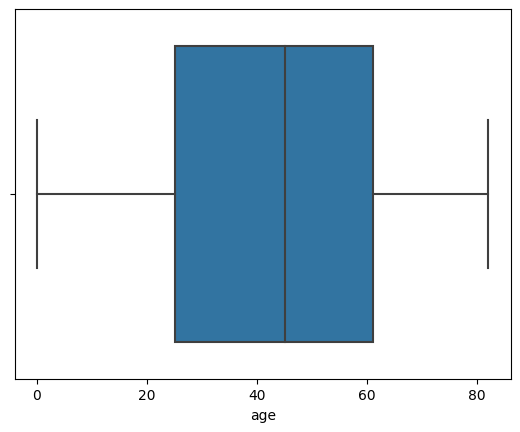

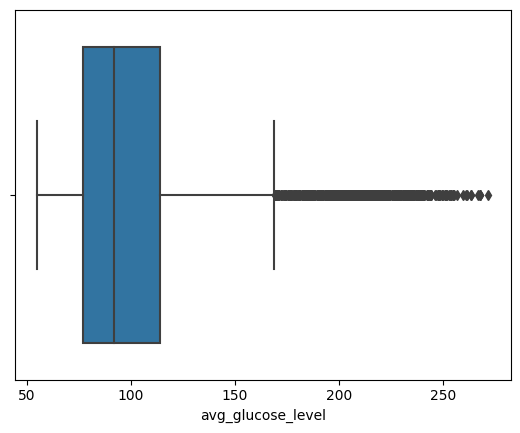

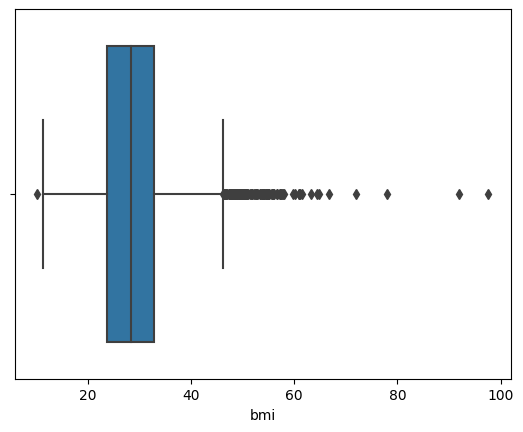

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in ['age','avg_glucose_level','bmi']:
    sns.boxplot(x=stroke_data[col])
    plt.show()

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    low  = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > low) & (df_in[col_name] < high)]
    return df_out

In [ ]:
for i in ['age','avg_glucose_level','bmi']:
  stroke_data = remove_outlier(stroke_data,i)

In [ ]:
stroke_data.shape

(4383, 11)

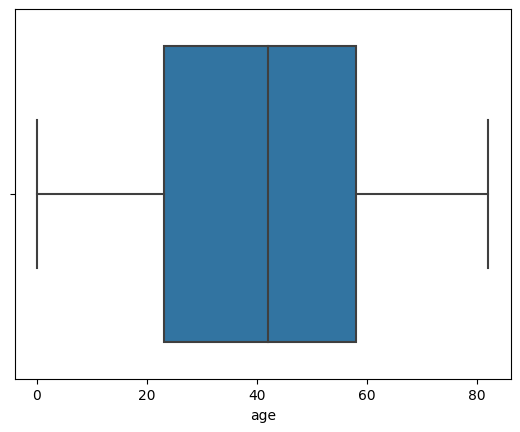

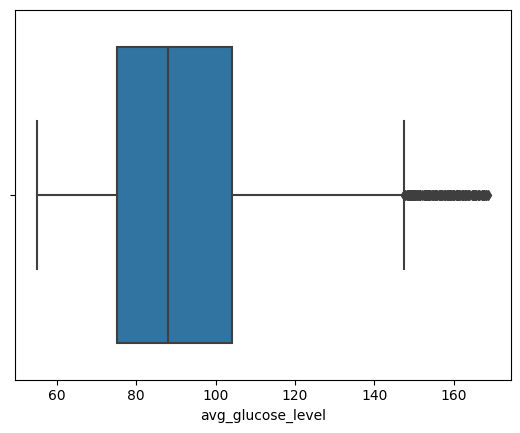

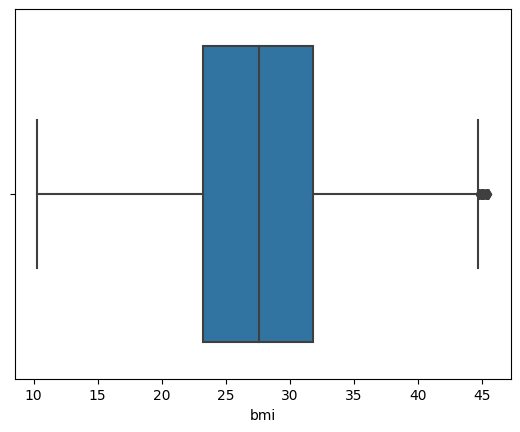

In [ ]:
for col in ['age','avg_glucose_level','bmi']:
    sns.boxplot(x=stroke_data[col])
    plt.show()

In [ ]:
stroke_data.stroke.value_counts()

0    4219
1     164
Name: stroke, dtype: int64

Correlation

In [ ]:
corr = stroke_data.corr()
corr

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.047054,0.019768,0.089258,-0.046395,0.067069,-0.004866,0.032461,-0.000976,-0.054834,-0.003208
age,-0.047054,1.000000,0.252186,0.239679,0.685152,-0.390332,0.011288,-0.024772,0.381222,0.288246,0.227557
hypertension,0.019768,0.252186,1.000000,0.090491,0.150608,-0.058583,-0.009552,0.002224,0.152933,0.116042,0.113637
heart_disease,0.089258,0.239679,0.090491,1.000000,0.106352,-0.028280,-0.012491,-0.000684,0.057383,0.056092,0.090173
ever_married,-0.046395,0.685152,0.150608,0.106352,1.000000,-0.373939,0.000126,-0.005236,0.376383,0.274741,0.093886
work_type,0.067069,-0.390332,-0.058583,-0.028280,-0.373939,1.000000,-0.002985,0.013454,-0.354487,-0.334006,-0.025020
Residence_type,-0.004866,0.011288,-0.009552,-0.012491,0.000126,-0.002985,1.000000,-0.013735,0.011529,0.015973,0.009009
avg_glucose_level,0.032461,-0.024772,0.002224,-0.000684,-0.005236,0.013454,-0.013735,1.000000,0.000483,-0.002887,0.000119
bmi,-0.000976,0.381222,0.152933,0.057383,0.376383,-0.354487,0.011529,0.000483,1.000000,0.261188,0.032416
smoking_status,-0.054834,0.288246,0.116042,0.056092,0.274741,-0.334006,0.015973,-0.002887,0.261188,1.000000,0.022761


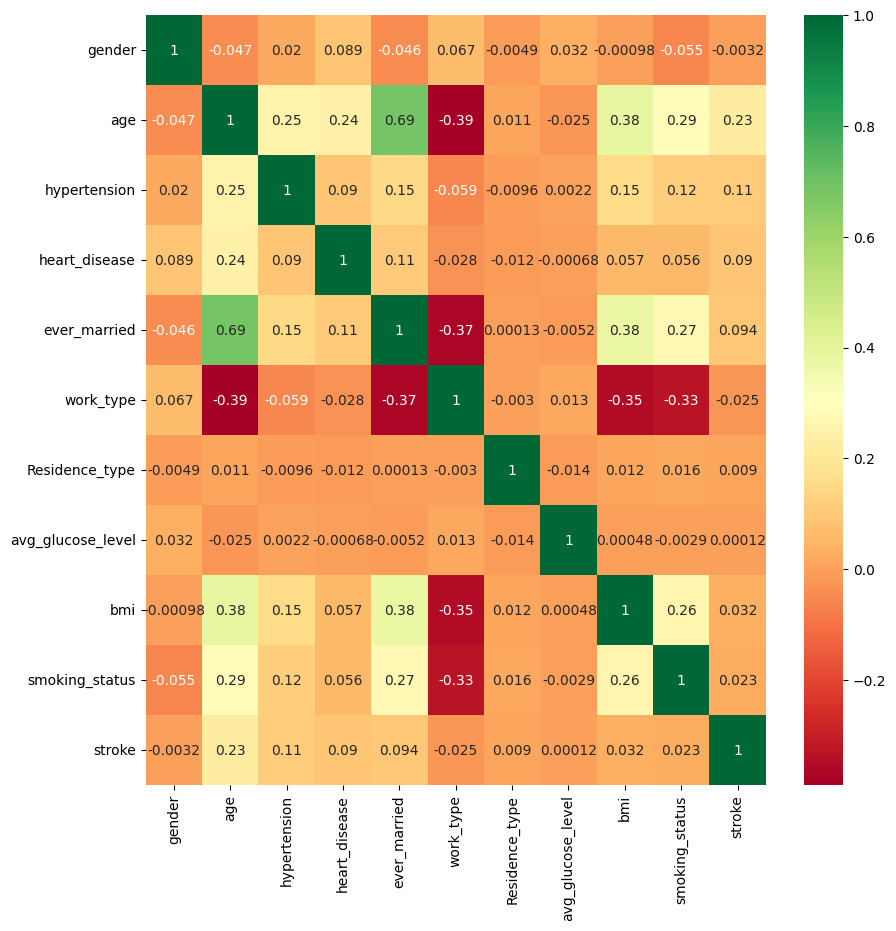

In [ ]:
 plt.figure(figsize=(10, 10))
 sns.heatmap(corr, cmap="RdYlGn", annot=True)
 plt.show()

In [ ]:
X=stroke_data.drop(['stroke'],axis=1)
Y=stroke_data.iloc[:,-1].values

In [ ]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2,3,4,5,6,9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[  0.  ,   1.  ,   0.  , ...,  80.  , 105.92,  32.5 ],
       [  0.  ,   1.  ,   0.  , ...,  74.  ,  70.09,  27.4 ],
       [  1.  ,   0.  ,   0.  , ...,  69.  ,  94.39,  22.8 ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,  35.  ,  82.99,  30.6 ],
       [  0.  ,   1.  ,   0.  , ...,  51.  , 166.29,  25.6 ],
       [  1.  ,   0.  ,   0.  , ...,  44.  ,  85.28,  26.2 ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state =9)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
clf = RandomForestClassifier(max_depth=50, random_state=0,n_estimators=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9574468085106383

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[630,   0],
       [ 28,   0]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       630
           1       0.00      0.00      0.00        28

    accuracy                           0.96       658
   macro avg       0.48      0.50      0.49       658
weighted avg       0.92      0.96      0.94       658



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9574468085106383

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[630,   0],
       [ 28,   0]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       630
           1       0.00      0.00      0.00        28

    accuracy                           0.96       658
   macro avg       0.48      0.50      0.49       658
weighted avg       0.92      0.96      0.94       658



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


OverSampling

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
print(Counter(Y))
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, Y_over = oversample.fit_resample(X, Y)
print(Counter(Y_over))

Counter({0: 4219, 1: 164})
Counter({1: 4219, 0: 4219})


In [ ]:
X_trainover, X_testover, y_trainover, y_testover = train_test_split(X_over, Y_over, test_size = .2, random_state = 42)

In [ ]:
accuracy = []
preci=[]
recall = []
f1 = []

def algodetails(rep):
  accuracy.append(rep['accuracy'])
  preci.append(rep['macro avg']['precision'])
  recall.append(rep['macro avg']['recall'])
  f1.append(rep['macro avg']['f1-score'])

Random Forest Classifier

In [ ]:
ranclfover= RandomForestClassifier(max_depth=50, random_state=0,n_estimators=50)
ranclfover.fit(X_trainover, y_trainover)

RandomForestClassifier(max_depth=50, n_estimators=50, random_state=0)

In [ ]:
y_predover = ranclfover.predict(X_testover)

In [ ]:
accuracy_score(y_testover,y_predover)

0.9946682464454977

In [ ]:
print(classification_report(y_testover, y_predover))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       838
           1       0.99      1.00      0.99       850

    accuracy                           0.99      1688
   macro avg       0.99      0.99      0.99      1688
weighted avg       0.99      0.99      0.99      1688



In [ ]:
report = classification_report(y_testover, y_predover,output_dict=True)
algodetails(report)

In [ ]:
cm = confusion_matrix(y_testover, y_predover)
cm

array([[829,   9],
       [  0, 850]])

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(X_trainover, y_trainover)

LogisticRegression()

In [ ]:
y_predover = Logreg.predict(X_testover)

In [ ]:
print(classification_report(y_testover, y_predover))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       838
           1       0.76      0.77      0.76       850

    accuracy                           0.76      1688
   macro avg       0.76      0.76      0.76      1688
weighted avg       0.76      0.76      0.76      1688



In [ ]:
report = classification_report(y_testover, y_predover,output_dict=True)
algodetails(report)

In [ ]:
cm = confusion_matrix(y_testover, y_predover)
cm

array([[627, 211],
       [195, 655]])

Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_trainover, y_trainover)
y_predover = gnb.predict(X_testover)

In [ ]:
print(classification_report(y_testover, y_predover))

              precision    recall  f1-score   support

           0       0.96      0.24      0.38       838
           1       0.57      0.99      0.72       850

    accuracy                           0.62      1688
   macro avg       0.76      0.61      0.55      1688
weighted avg       0.76      0.62      0.55      1688



In [ ]:
report = classification_report(y_testover, y_predover,output_dict=True)
algodetails(report)

In [ ]:
cm = confusion_matrix(y_testover, y_predover)
cm

array([[199, 639],
       [  9, 841]])

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dest = DecisionTreeClassifier(max_depth=50)
dest.fit(X_trainover, y_trainover)
y_predover = dest.predict(X_testover)

In [ ]:
print(classification_report(y_testover, y_predover))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       838
           1       0.96      1.00      0.98       850

    accuracy                           0.98      1688
   macro avg       0.98      0.98      0.98      1688
weighted avg       0.98      0.98      0.98      1688



In [ ]:
report = classification_report(y_testover, y_predover,output_dict=True)
algodetails(report)

In [ ]:
cm = confusion_matrix(y_testover, y_predover)
cm

array([[804,  34],
       [  0, 850]])

Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_trainover, y_trainover)
y_predover = nn.predict(X_testover)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print(classification_report(y_testover, y_predover))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83       838
           1       0.78      0.99      0.87       850

    accuracy                           0.85      1688
   macro avg       0.88      0.85      0.85      1688
weighted avg       0.88      0.85      0.85      1688



In [ ]:
report = classification_report(y_testover, y_predover,output_dict=True)
algodetails(report)

In [ ]:
cm = confusion_matrix(y_testover, y_predover)
cm

array([[593, 245],
       [  6, 844]])

Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svma = SVC()
svma.fit(X_trainover, y_trainover)
y_predover = svma.predict(X_testover)

In [ ]:
print(classification_report(y_testover, y_predover))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       838
           1       0.82      0.93      0.87       850

    accuracy                           0.86      1688
   macro avg       0.87      0.86      0.86      1688
weighted avg       0.87      0.86      0.86      1688



In [ ]:
report = classification_report(y_testover, y_predover,output_dict=True)
algodetails(report)

In [ ]:
cm = confusion_matrix(y_testover, y_predover)
cm

array([[670, 168],
       [ 62, 788]])

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_trainover, y_trainover)
y_predover = knn.predict(X_testover)

In [ ]:
print(classification_report(y_testover, y_predover))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       838
           1       0.92      1.00      0.96       850

    accuracy                           0.96      1688
   macro avg       0.96      0.96      0.96      1688
weighted avg       0.96      0.96      0.96      1688



In [ ]:
report = classification_report(y_testover, y_predover,output_dict=True)
algodetails(report)

In [ ]:
cm = confusion_matrix(y_testover, y_predover)
cm

array([[734, 104],
       [  0, 850]])

Algorithm comparison

In [ ]:
algo_liste=["Random Forest","Logistic Regression","Naive Bayes","Decision Tree","Neural Networks","Support Vector Machine","KNN"]
score={"algorithms":algo_liste,"Accuracy":accuracy,"precision":preci,"recall":recall,"f1_score":f1}

In [ ]:
df = pd.DataFrame(score)
df

,algorithms,Accuracy,precision,recall,f1_score
0,Random Forest,0.994668,0.994761,0.994630,0.994667
1,Logistic Regression,0.759479,0.759562,0.759399,0.759412
2,Naive Bayes,0.616114,0.762487,0.613441,0.551193
3,Decision Tree,0.979858,0.980769,0.979714,0.979843
4,Neural Networks,0.851303,0.882503,0.850289,0.847941
5,Support Vector Machine,0.863744,0.869784,0.863291,0.863075
6,KNN,0.956754,0.960455,0.956444,0.956644


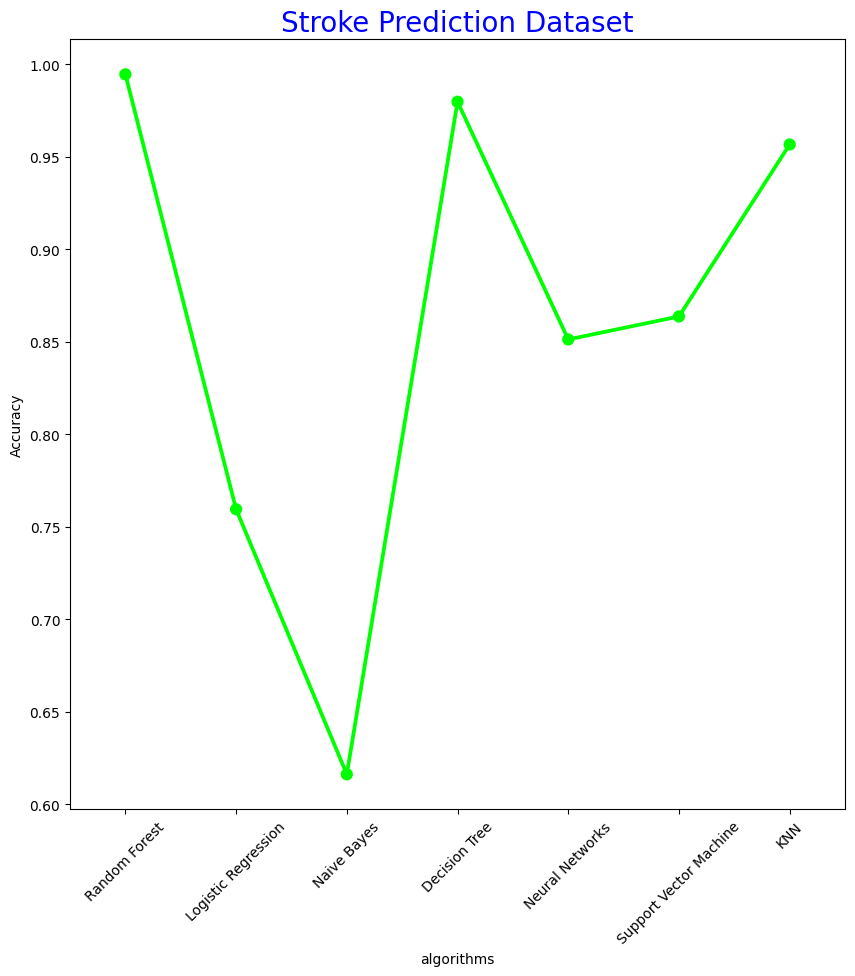

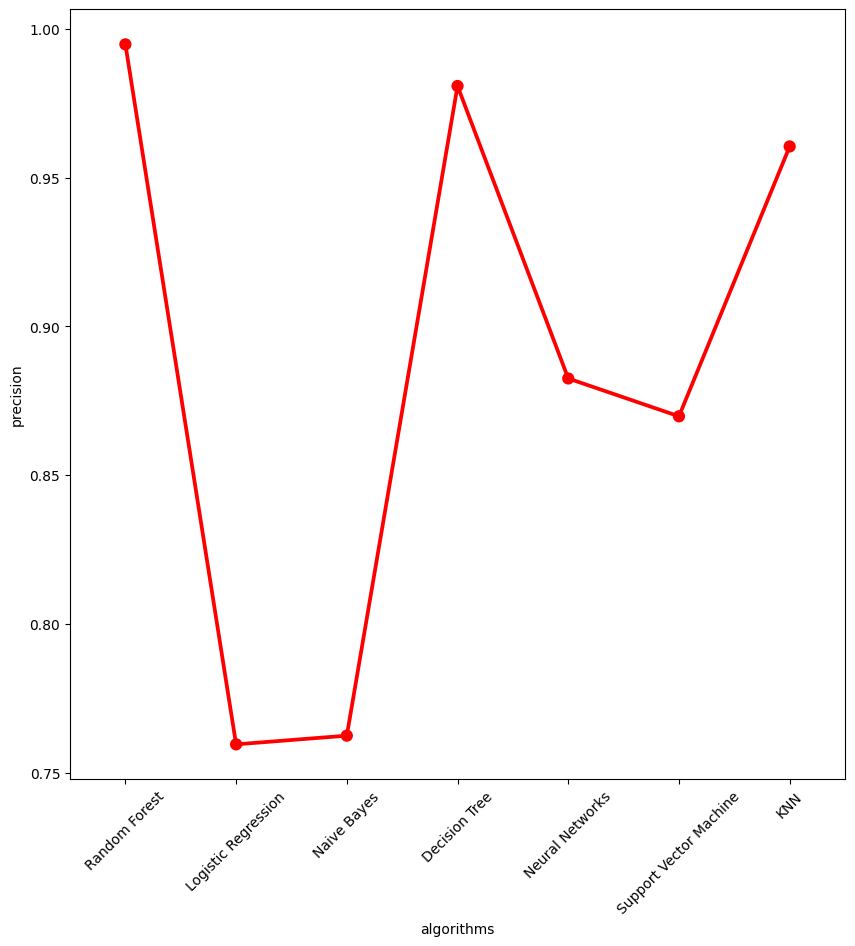

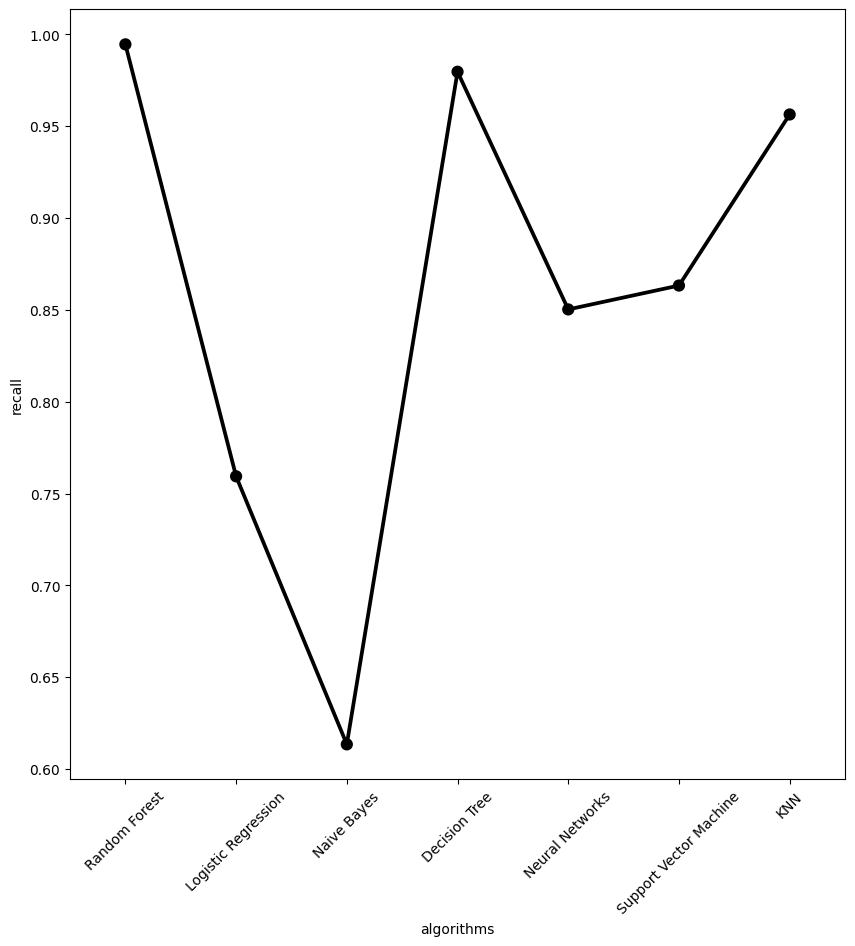

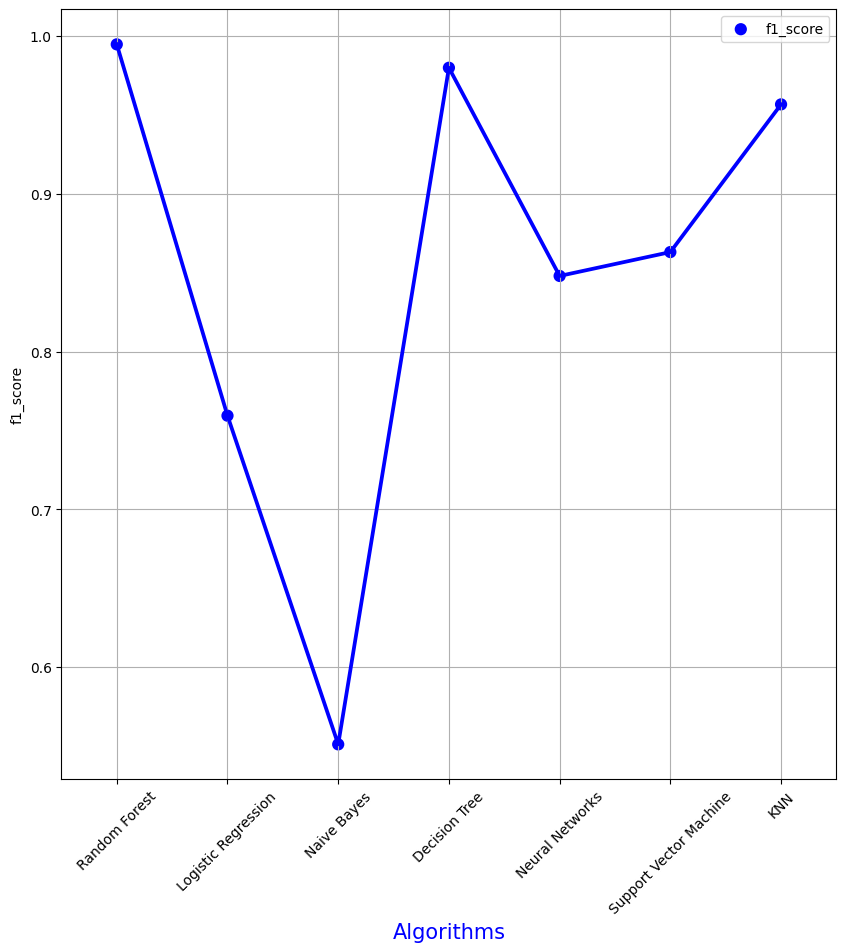

In [ ]:
#@title
f,ax1 = plt.subplots(figsize =(10,10))
plt.title('Stroke Prediction Dataset',fontsize = 20,color='blue')
plt.xticks(rotation= 45)
plt.figure(1)

sns.pointplot(x=df['algorithms'], y=df['Accuracy'],data=df,color='lime',label="Accuracy")
f,ax1 = plt.subplots(figsize =(10,10))
plt.xticks(rotation= 45)
plt.figure(2)
sns.pointplot(x=df['algorithms'], y=df['precision'],data=df,color='red',label="precision")
f,ax1 = plt.subplots(figsize =(10,10))
plt.xticks(rotation= 45)
plt.figure(3)
sns.pointplot(x=df['algorithms'], y=df['recall'],data=df,color='black',label="recall")
f,ax1 = plt.subplots(figsize =(10,10))
plt.xticks(rotation= 45)
plt.figure(4)
sns.pointplot(x=df['algorithms'], y=df['f1_score'],data=df,color='blue',label="f1_score")
plt.xlabel('Algorithms',fontsize = 15,color='blue')
# plt.ylabel('Score',fontsize = 15,color='blue')
plt.xticks(rotation= 45)

plt.grid()
plt.legend()
plt.show()

In [ ]:
tt = {"gender":['Male'],	"age":[67],	"hypertension":[1],"heart_disease":[1]	,"ever_married":['Yes'],	"work_type":['Private'],	"Residence_type":['Urban'],	"avg_glucose_level":[228.60],	"bmi":[36.6],	"smoking_status":['smokes']}
tt = pd.DataFrame(tt)
tt.iloc[:, 0] = labelencodergen.transform(tt.iloc[:, 0])
tt.iloc[:, 4] = labelencodermar.transform(tt.iloc[:, 4])
tt.iloc[:, 5] = labelencoderwork.transform(tt.iloc[:, 5])
tt.iloc[:, 6]= labelencoderres.transform(tt.iloc[:, 6]) 
tt.iloc[:, 9] = labelencodersmoke.transform(tt.iloc[:, 9])
tt

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67,1,1,1,2,1,228.6,36.6,3


In [ ]:
tt = np.array(ct.transform(tt))
tt

array([[  0. ,   1. ,   0. ,   0. ,   1. ,   0. ,   1. ,   0. ,   1. ,
          0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,
          0. ,   1. ,  67. , 228.6,  36.6]])

In [ ]:
ranclfover.predict(tt)

array([0])